<a href="https://colab.research.google.com/github/tonyhollaar/projects/blob/main/Example%201%3A%20Web%20Scraping%20Public%20Dataset%20-%20US%20Labor%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Webscraping with API -  U.S. Bureau of Labor Statistics
* Link public datasets Bureau Labor Statistics: https://www.bls.gov/
* source: https://www.bls.gov/developers/api_python.htm#python2
* source2: https://github.com/jasonwashburn/bls_api_to_pandas/blob/main/bls_api_to_pandas.ipynb



# API Version 2.0 Python Example Code
Multiple Series and Multiple Years

Note: Use this code to retrieve data for more than one timeseries and more than one year.

- Series Title 	: 	Gasoline, unleaded regular, per gallon/3.785 liters in U.S. city average, average price, not seasonally adjusted
- Series ID 	: 	APU000074714
- Survey Name 	: 	CPI Average Price Data, U.S. city average (AP)
- Measure Data Type 	: 	Gasoline, unleaded regular, per gallon/3.785 liters
- Area 	: 	U.S. city average
- Item 	: 	Gasoline, unleaded regular, per gallon/3.785 liters

In [3]:
# Data Packages
import pandas as pd
from pandas.core.dtypes.dtypes import dtypes
import math
import numpy as np
import json
import requests
import re

# Visualization Packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns

In [42]:
# create empty list to save data to
parsed_data = []

# source: https://www.bls.gov/developers/api_python.htm#python2
headers = {'Content-type': 'application/json'}

# set the variable to retrieve from public dataset -> APU000074714
# set the daterange with startyear and endyear 
data = json.dumps({"seriesid": ['APU000074714'],"startyear":"2018", "endyear":"2023"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

# iterate over the json file
for series in json_data['Results']['series']:
    seriesId = series['seriesID']
    # iterate over the list of lists that contains the data
    for item in series['data']:
        # within each list retrieve the year, period, value and footnotes
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
            parsed_data.append([seriesId,year,period,value,footnotes[0:-1]])

# convert json data into pandas dataframe
df = pd.DataFrame(parsed_data, columns=['seriesID', 'year', 'period', 'value', 'footnotes'])

# change datatype for column value to numeric
df['value'] = pd.to_numeric(df['value'])

# change period to integer value as numeric datatype
df['month'] = pd.to_numeric(df['period'].replace({'M':''}, regex=True))

# add date column
df['date'] = df['month'].map(str)+ '-' +df['year'].map(str)
df['date'] = pd.to_datetime(pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y'))

# add percent change column e.g. 1 equals 1%
df['perct_change_value'] = df['value'].pct_change()*100

# sort dataframe from oldest to newest value
df = df.sort_values(by= ['year', 'month'], ascending=True)

In [43]:
# get last x rows from pandas dataframe
df.head(5)

,seriesID,year,period,value,footnotes,month,date,perct_change_value
58,APU000074714,2018,M01,2.539,,1,2018-01-01,-1.398058
57,APU000074714,2018,M02,2.575,,2,2018-02-01,0.116641
56,APU000074714,2018,M03,2.572,,3,2018-03-01,-6.028498
55,APU000074714,2018,M04,2.737,,4,2018-04-01,-5.847953
54,APU000074714,2018,M05,2.907,,5,2018-05-01,-0.240220


In [6]:
# get dataframe stats
df.describe()

,value,month,perct_change_value
count,59.000000,59.000000,58.000000
mean,2.930949,6.406780,-0.527564
std,0.721453,3.434704,6.236835
min,1.876000,1.000000,-16.697588
25%,2.480500,3.500000,-4.255772
50%,2.776000,6.000000,-0.433904
75%,3.260000,9.000000,1.910876
max,5.058000,12.000000,20.842217


In [7]:
# check dataframe datatypes
df.dtypes

seriesID                      object
year                          object
period                        object
value                        float64
footnotes                     object
month                          int64
date                  datetime64[ns]
perct_change_value           float64
dtype: object

# Visualize (with Pandas)

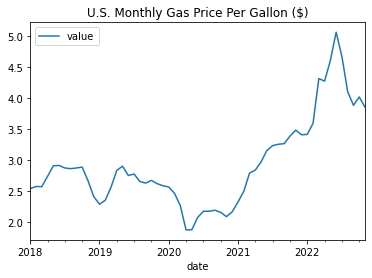

In [8]:
# plot the graph
df.plot(x='date', y='value', title='U.S. Monthly Gas Price Per Gallon ($)')

# Visualize (with Matplotlib)

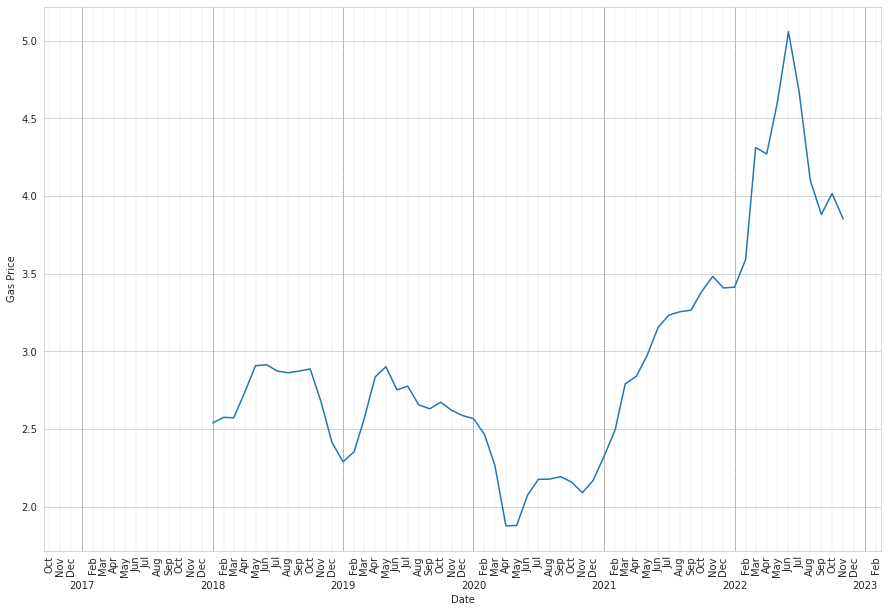

In [40]:
#############################################
# create a graph with seaborn and matplotlib
#############################################
# set the figure size 
my_figsize = (15,10)
fig, ax = pyplot.subplots(figsize=my_figsize)
# Set the x-axis label
x_axis_label = "Date"
# Set the y-axis label
y_axis_label = "Gas Price"
# Set the x-axis label
plt.xlabel(x_axis_label)
# Set the y-axis label
plt.ylabel(y_axis_label)

# set the style of the plot
sns.set_style("whitegrid")
sns.lineplot(x="date", y="value", data=df)

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

for xmaj in ax.xaxis.get_majorticklocs():
  ax.axvline(color='grey', x=xmaj, ls='--', linewidth=0.5)

for xmin in ax.xaxis.get_minorticklocs():
  ax.axvline(color='grey', x=xmin, ls='-', linewidth=0.1)

# Show the plot
plt.show()

# Visualize (with Plotly Package)
- source: https://plotly.com/python/

## Absolute Values

In [30]:
# create plotly linegraph object 
fig = px.line(data_frame=df, x="date", y="value")
     
# set labels for x and y axis
fig.update_layout(title='U.S. Monthly Gas Price Per Gallon', # set title 
                  title_x=0.5, # center align title
                  xaxis_title="Date", # set x label
                  yaxis_title="Gas Price per gallon ($)", # set y label
                  width=800, 
                  height=500,
                  template='plotly',
                  plot_bgcolor = 'white',
                  # x-axis setttings in dictionary defined
                  xaxis = dict(showline = True,
                               showgrid = True,
                               linecolor = 'black',
                               linewidth=0.5,
                               tickfont = dict(size=14, family = 'Arial'),
                               ticks = "outside",
                               ticklabelmode= "period", 
                               tickcolor= "black",
                               rangemode="tozero",
                               gridcolor='whitesmoke'),
                  yaxis = dict(ticks= "outside", 
                               ticklabelmode= "period", 
                               linecolor='black', 
                               linewidth=0.5,
                               tickcolor= "black",
                               rangemode="tozero",
                               gridcolor='whitesmoke',
                              )
                  )

# set interval 3 months with year and do not rotate text 90 degrees e.g. set 0
fig.update_xaxes(dtick="M3", tickformat="%b\n%Y", tickangle=0)

# set the line color
fig.update_traces(line_color='cornflowerblue', showlegend=True, name="Gas Price ($)" )     

# show graph
fig.show()

## % Change Graph

In [49]:
# create plotly linegraph object 
fig = px.line(data_frame=df, x="date", y="perct_change_value")
     
# set labels for x and y axis
fig.update_layout(title='Month-over-Month <br> Percentage Change <br> U.S. Gas Price Per Gallon', # set title 
                  title_x=0.5, # center align title
                  xaxis_title="Date", # set x label
                  title_font = dict(size=15), 
                  yaxis_title="Gas Price per gallon ($)", # set y label
                  width=800, 
                  height=500,
                  template='plotly',
                  plot_bgcolor = 'white',
                  # x-axis setttings in dictionary defined
                  xaxis = dict(showline = True,
                               showgrid = True,
                               linecolor = 'black',
                               linewidth=0.5,
                               tickfont = dict(size=14, family = 'Arial'),
                               ticks = "outside",
                               ticklabelmode= "period", 
                               tickcolor= "black",
                               rangemode="tozero",
                               gridcolor='whitesmoke'),
                  yaxis = dict(ticks= "outside", 
                               ticklabelmode= "period", 
                               linecolor='black', 
                               linewidth=0.5,
                               tickcolor= "black",
                               rangemode="tozero",
                               gridcolor='whitesmoke',
                              )
                  )

# set interval 3 months with year and do not rotate text 90 degrees e.g. set 0
fig.update_xaxes(dtick="M3", tickformat="%b\n%Y", tickangle=0)

# set the line color
fig.update_traces(line_color='cornflowerblue', showlegend=True, name="% Change <br> Month-over-Month <br> Gas Price ($)" )     

# show graph
fig.show()